In [108]:
#1. Plot the function y=f(x)=x^3-1/x and its tangent line when x=1.
import numpy as np
from IPython import display
from d2l import torch as d2l
import math
from sympy import *                                                                                        

def f(x):
    return x ** 3 - (1/x)

In [109]:
def use_svg_display():  #顯示圖
    """Use the svg format to display a plot in Jupyter."""
    display.set_matplotlib_formats('svg')

In [110]:
def set_figsize(figsize=(3.5, 2.5)):  #設定圖大小
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [111]:
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend): #設定圖要顯示的東西
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim) #設定x軸範圍
    axes.set_ylim(ylim) #設定y軸範圍
    if legend:
        axes.legend(legend)
    axes.grid()

In [112]:
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # Return True if `X` (tensor or list) has 1 axis
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or
                isinstance(X, list) and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    #axes.cla()
    
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

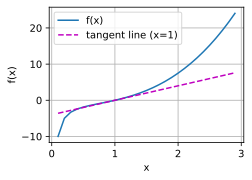

In [113]:
x = np.arange(0.1, 3, 0.1)
plot(x, [f(x),4 * x - 4 ], 'x', 'f(x)', legend=['f(x)', 'tangent line (x=1)'])

In [135]:
#2. Find the gradient of the function  f(x)=3*x1^2+5*e^x2
import torch
x = torch.arange(2.0)
x.requires_grad_(True)
y = 3 * x[0]**2 + 5 * torch.exp(x[1])
y.backward
print(y)

tensor(13.5914, grad_fn=<AddBackward0>)
